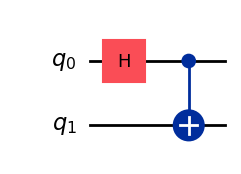

In [1]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.draw(output='mpl')

In [17]:
from qiskit.quantum_info import Pauli

ZZ = Pauli('ZZ')
ZI = Pauli('ZI')
IZ = Pauli('IZ')
XX = Pauli('XX')
XI = Pauli('XI')
IX = Pauli('IX')

observables = [ZZ,ZI,IZ,XX,XI,IX]


In [3]:
from qiskit_aer.primitives import Estimator

estimator  = Estimator()
job = estimator.run([qc]*len(observables),observables)
job.result()


NameError: name 'observables' is not defined

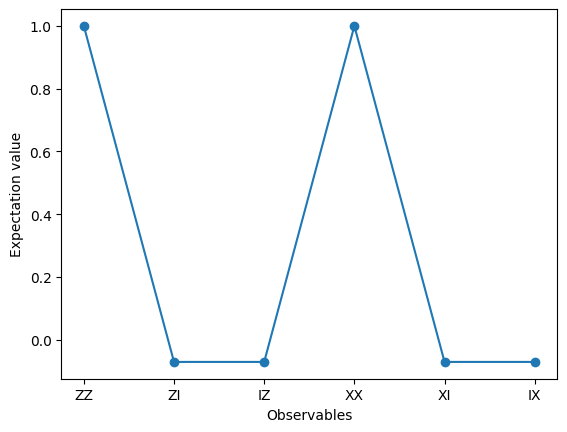

In [19]:
import matplotlib.pyplot as plt

data = ['ZZ','ZI','IZ','XX','XI','IX']
values = job.result().values

plt.plot(data,values,'-o')
plt.xlabel('Observables')
plt.ylabel('Expectation value')
plt.show()